# Basic Setup

In [2]:
function C = cleanUp()
%CleanUp function in octave
%   C = cleanUp() To CleanUp Octave Workspace

    clear ; 
    close all; 
    clc

end

In [5]:
function [X, y, m] = load_training_data(file)
%load_data Loads CSV Data  
%   load_data(filename) Loads CSV Data from the file
    
    %% Load Data
    training_data = load(file);
    ncols = size(training_data,2);
    X = training_data(:, 1:ncols-1);
    y = training_data(:, ncols);
    m = length(y);

end

In [7]:
function [X_norm, mu, sigma] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

% You need to set these values correctly
X_norm = X;
mu = zeros(1, size(X, 2));
sigma = zeros(1, size(X, 2));

% ====================== Feature Normalization ======================
% Instructions: First, for each feature dimension, compute the mean
%               of the feature and subtract it from the dataset,
%               storing the mean value in mu. Next, compute the 
%               standard deviation of each feature and divide
%               each feature by it's standard deviation, storing
%               the standard deviation in sigma.
%       


mu = mean(X);
sigma = std(X);

X_norm = bsxfun(@minus, X, mu);
X_norm = bsxfun(@rdivide, X_norm, sigma);


% ============================================================

end

In [11]:
function J = computeCost(X, y, theta)
%COMPUTECOST Compute cost for linear regression with multiple variables
%   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;

% ====================== Compute Cost ======================
% 	Original Formala : http://bit.ly/2KVLslg

% Each observation is stored  as a row in  X Matrix
% To take into account the intercept term theta_zero,
% we add an additional 1st column to X and set it to all ones. 
% This allows us to treat theta_zero as simply another `feature'.

% Using Matrix Multiplication
% Cost Function can thus be depicted in Matrix Multiplication as below
% X' means  Transpose of Matrix X

J = (1/(2*m)) * (X * theta - y)' * (X * theta - y);

% =============================================================

end

In [12]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESCENT(x, y, theta, alpha, num_iters) updates theta by
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters

    % ====================== Gradient Descent ======================
    % Instructions: Perform a single gradient step on the parameter vector
    %               theta. 
    %
    %   Original Formala : http://bit.ly/2LlH7Ee
    %            
    % Each observation is stored  as a row in  X Matrix
    % To take into account the intercept term theta_zero,
    % we add an additional 1st column to X and set it to all ones. 
    % This allows us to treat theta_zero as simply another `feature'.

    % Using Matrix Multiplication
    % Gradient Descent can thus be depicted in Matrix Multiplication as below
    % X' means  Transpose of Matrix X

    theta = theta - (alpha/m) * (X' * (X * theta - y));

    % ============================================================

    % Save the cost J in every iteration    
    J_history(iter) = computeCost(X, y, theta);

end

end

In [20]:
function [theta] = normalEqn(X, y)
%NORMALEQN Computes the closed-form solution to linear regression 
%   NORMALEQN(X,y) computes the closed-form solution to linear 
%   regression using the normal equations.

theta = zeros(size(X, 2), 1);

% ====================== Normal Equation ======================
% compute the closed form solution to linear regression and put the result
% in theta.

theta = pinv(X' * X) * (X' * y);

% ============================================================

end



In [13]:
cleanUp

training_data_set = '../data/house_price_training_data.txt';
prediction_data_set = '../data/house_price_predict.txt';

fprintf('Loading data ...\n');
[X y m] = load_training_data(training_data_set);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');


Loading data ...
First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 



# Scale features and set them to zero mean - Normalize Features

In [14]:
[X mu sigma] = featureNormalize(X);

% Add intercept term to X
X = [ones(m, 1) X];

# Gradient Descent

In [15]:
% Choose some alpha value
alpha = 1;
num_iters = 50;

% Init Theta and Run Gradient Descent 
ncols=size(X,2);
theta = zeros(ncols, 1); 
[theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters);

# Plot the convergence graph - Gradient Descent

Theta computed from gradient descent: 
 340412.659574 
 110631.050279 
 -6649.474271 



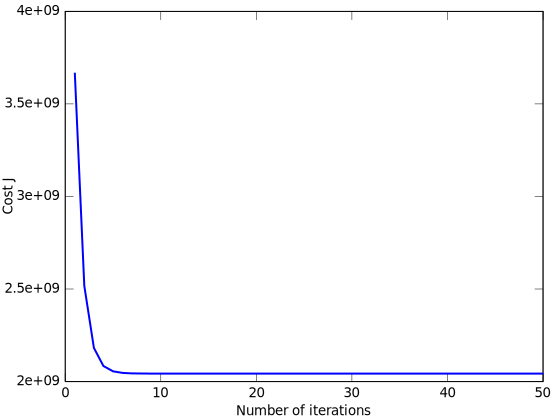

In [16]:
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');

# Predict price of a 1650 sq-ft, 3 br house - Gradient Descent

In [18]:
price = 0; 
prediction_data = load(prediction_data_set);
price = prediction_data * theta;
printf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $182861697.196800


#  Predict price of a 1650 sq-ft, 3 br house - With Normal Equation

In [22]:
%% Load Data
[X y m] = load_training_data(training_data_set);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');

price = 0; 
prediction_data = load(prediction_data_set);
price = prediction_data * theta;
fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);

Theta computed from the normal equations: 
 89597.909542 
 139.210674 
 -8738.019112 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
